#Phishing Website Detection Using Machine Learning

#Overview of the Problem

    ##What is phishing?
        - A cyber-attack where fraudulent websites steal sensitive information.
        Why is it important?
        Protects users from scams, financial loss, and identity theft.
        Role of Machine Learning
        Automates phishing detection using website features.
        
        Dataset Overview
        The dataset contains 30 features.
        Labels: Result (-1 for phishing, 1 for legitimate).
        Features include:
        URL-based: Having IP Address, URL Length, Shortening Service
        Domain-based: SSL State, Domain Registration Length
        Content-based: Request URL, Links in Tags, Iframes

#Data Preprocessing

- Handling missing values
Converting categorical data
Normalizing feature values
Splitting data into training & testing sets

##Model Selection & Training

###Popular ML models for classification:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- Gradient Boosting (XGBoost)


#Model Evaluation and Deployment

##Model Evaluation
- Performance Metrics:
Accuracy, Precision, Recall, F1-score
Confusion Matrix to analyze false positives/negatives

#Flow of the Project Demo

- Introduction
- Environment Setup
- Dataset Exploration
- Data Preprocessing
- Feature Engineering
- Model Training & Evaluation
- FastAPI Deployment
- Docker
- Cloud Deployment
- CI/CD with GitHub Actions
- Terraform Infrastructure
- Final Wrap-Up



##Datasets link : https://www.kaggle.com/datasets/sai10py/phishing-websites-data

#Dataset Information
- Total Columns: 31 (30 Features + 1 Target)
- Target Variable: Result (Indicates whether a website is phishing or legitimate)

#Features Description

##URL-Based Features
- Prefix_Suffix – Checks if the URL contains a hyphen (-), which is commonly used in phishing domains.
- double_slash_redirecting – Detects if the URL redirects using //, which may indicate a phishing attempt.
- having_At_Symbol – Identifies the presence of @ in the URL, which can be used to deceive users.
- Shortining_Service – Indicates whether the URL uses a shortening service (e.g., bit.ly, tinyurl).
- URL_Length – Measures the length of the URL; phishing URLs tend to be longer.
- having_IP_Address – Checks if an IP address is used in place of a domain name, which is suspicious.

##Domain-Based Features
- having_Sub_Domain – Evaluates the number of subdomains; phishing sites often have excessive subdomains.
- SSLfinal_State – Indicates whether the website has a valid SSL certificate (secure connection).
- Domain_registeration_length – Measures the duration of domain registration; phishing sites often have short lifespans.
- age_of_domain – The age of the domain in days; older domains are usually more trustworthy.
- DNSRecord – Checks if the domain has valid DNS records; phishing domains may lack these.

##Webpage-Based Features
- Favicon – Determines if the website uses an external favicon (which can be a sign of phishing).
- port – Identifies if the site is using suspicious or non-standard ports.
- HTTPS_token – Checks if "HTTPS" is included in the URL but is used deceptively.
- Request_URL – Measures the percentage of external resources loaded from different domains.
- URL_of_Anchor – Analyzes anchor tags (<a> links) and their trustworthiness.
- Links_in_tags – Examines <meta>, <script>, and <link> tags for external links.
- SFH (Server Form Handler) – Determines if form actions are handled suspiciously.
- Submitting_to_email – Checks if forms submit data directly to an email instead of a web server.
- Abnormal_URL – Identifies if the website’s URL structure is inconsistent with common patterns.
- Redirect – Counts the number of redirects; phishing websites may have excessive redirects.

##Behavior-Based Features
- on_mouseover – Checks if the website changes content when hovered over (used in deceptive techniques).
- RightClick – Detects if right-click functionality is disabled (phishing sites may disable it).
- popUpWindow – Identifies the presence of pop-ups, which can be used to trick users.
- Iframe – Checks if the website uses <iframe> tags, often used in phishing attacks.

##Traffic & Search Engine Features
- web_traffic – Measures the website’s Alexa ranking; phishing sites tend to have low traffic.
- Page_Rank – Google PageRank score; phishing sites usually have a low PageRank.
- Google_Index – Checks if the website is indexed by Google (phishing sites may not be indexed).
- Links_pointing_to_page – Counts the number of backlinks pointing to the website.
- Statistical_report – Uses external sources to verify if the website has been reported for phishing.

##Target Variable
- Result – The classification label (1: Legitimate, -1: Phishing)

#Import CSV and required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/phising.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
df.shape

(11055, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

There are no null values in the dataset. Also, all the columns have datatype int64.

Let us closely look are the unique values present in the data.

In [5]:
for col in df.columns:
    print(df[col].value_counts())

having_IP_Address
 1    7262
-1    3793
Name: count, dtype: int64
URL_Length
-1    8960
 1    1960
 0     135
Name: count, dtype: int64
Shortining_Service
 1    9611
-1    1444
Name: count, dtype: int64
having_At_Symbol
 1    9400
-1    1655
Name: count, dtype: int64
double_slash_redirecting
 1    9626
-1    1429
Name: count, dtype: int64
Prefix_Suffix
-1    9590
 1    1465
Name: count, dtype: int64
having_Sub_Domain
 1    4070
 0    3622
-1    3363
Name: count, dtype: int64
SSLfinal_State
 1    6331
-1    3557
 0    1167
Name: count, dtype: int64
Domain_registeration_length
-1    7389
 1    3666
Name: count, dtype: int64
Favicon
 1    9002
-1    2053
Name: count, dtype: int64
port
 1    9553
-1    1502
Name: count, dtype: int64
HTTPS_token
 1    9259
-1    1796
Name: count, dtype: int64
Request_URL
 1    6560
-1    4495
Name: count, dtype: int64
URL_of_Anchor
 0    5337
-1    3282
 1    2436
Name: count, dtype: int64
Links_in_tags
 0    4449
-1    3956
 1    2650
Name: count, dtype: i

In [6]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


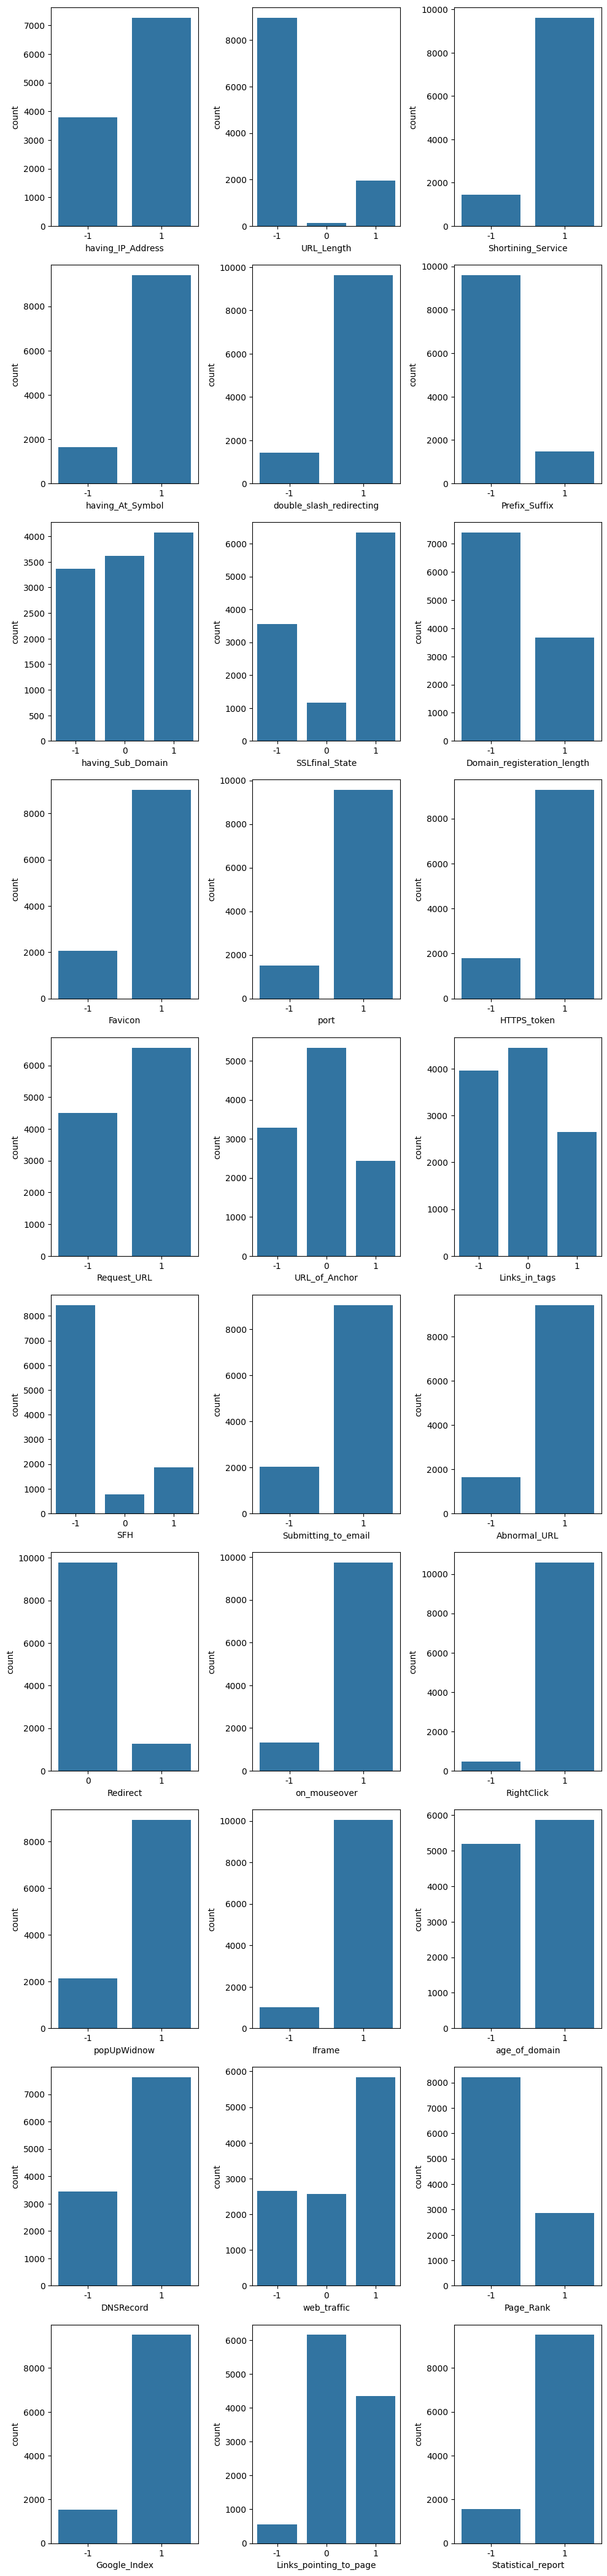

In [7]:
plt.figure(figsize=(10, 50), facecolor="white")
plotnumber = 1

for col in df.drop(['Result'], axis=1).columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(x=df[col], ax=ax)
    ax.set_xlabel(col, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

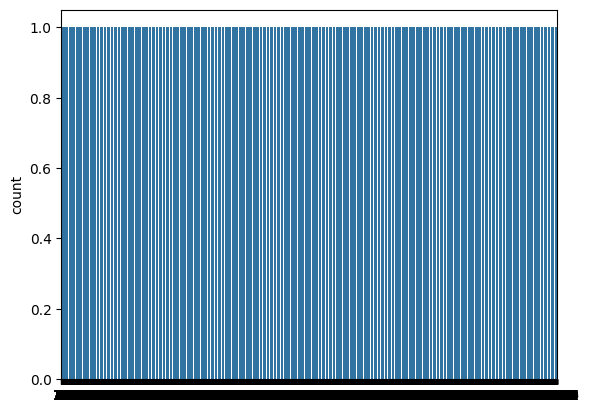

In [8]:
sns.countplot(df['Result'])